In [0]:
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from datetime import datetime
import pandas as pd
import re
from bs4 import BeautifulSoup
from threading import Thread
import jieba
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
total_news =200
dict_item={}

for start_id in range(0,total_news,20):
    print("start_id: ",start_id)
    url ='https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID='+str(start_id)+'&len=100'
    print(url)
    r = requests.get(url)
    if start_id==0:
        total_api = json.loads(r.text)
    else:
        api=json.loads(r.text)
        total_api['items'].extend(api['items'])
    print("len: ",len(total_api['items']))
    i=0

start_id:  0
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=0&len=100
len:  100
start_id:  20
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=20&len=100
len:  200
start_id:  40
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=40&len=100
len:  300
start_id:  60
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=60&len=100
len:  400
start_id:  80
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=80&len=100
len:  500
start_id:  100
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=100&len=100
len:  600
start_id:  120
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=120&len=100
len:  700
start_id:  140
https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=140&len=100
len:  800
start_id:  160
https://www.cupoy.com

In [8]:
print(total_api['items'][i].keys())
n = 0
for i in range(0,40):
    if 'bucketgrpids' in total_api['items'][i].keys():
        n=n+1
        print(i , total_api['items'][i]['bucketgrpids'])
print(n)

dict_keys(['itemuid', 'newsid', 'itemsrctype', 'ctype', 'title', 'description', 'thumbimgurl', 'linkurl', 'nationID', 'publishtime', 'bucketids', 'bucketgrpids', 'metrics', 'isLike', 'isCollect', 'isLocalUpload'])
0 ['3CExpert_tw', 'business_tw', 'tech_tw']
1 ['3CExpert_tw', 'tech_tw']
2 ['3CExpert_tw', 'tech_tw']
3 ['WhiteCollar_tw']
4 ['tech_tw']
8 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
9 ['3CExpert_tw', 'tech_tw']
10 ['WhiteCollar_tw', 'business_tw']
11 ['GamePlayer_tw', 'Game_tw']
14 ['InternationalFinance_tw', 'business_tw']
19 ['InternationalFinance_tw', 'business_tw']
20 ['InternationalFinance_tw', 'business_tw']
21 ['InternationalFinance_tw', 'WhiteCollar_tw', 'business_tw', 'tech_tw']
22 ['Babyhome_tw', 'CityTour_tw', 'Hedonism_tw', 'business_tw', 'life_tw']
23 ['WhiteCollar_tw']
24 ['tech_tw']
26 ['tech_tw']
28 ['3CExpert_tw', 'tech_tw']
29 ['3CExpert_tw', 'tech_tw']
33 ['InternationalFinance_tw', 'business_tw']
34 ['tech_tw']
35 ['tech_tw']
38 ['tech_tw']
23


In [9]:
#print(api.keys())

dict_item={}
for item in total_api['items']:
    for key, val in item.items():
        #print(key,val)
        if key in dict_item:
            dict_item[key].append(val)
        else:
            dict_item[key] = [val]
dict_grp={}
totalscore = 0
print(len(dict_item['bucketgrpids']))
dict_grp['others'] = total_news-float(len(dict_item['bucketgrpids']))
for new_id in range(0,len(dict_item['bucketgrpids'])):
    print(new_id,dict_item['bucketgrpids'][new_id])
    weight = 1/len(dict_item['bucketgrpids'][new_id])
    print(weight)
    for grp_key in dict_item['bucketgrpids'][new_id]:
        if grp_key in dict_grp:
            dict_grp[grp_key]=float(dict_grp[grp_key])+weight
        else:
            dict_grp[grp_key] = float(weight)
        totalscore = totalscore+float(weight)
        #print(totalscore)
print(dict_grp)
print(totalscore)
#print(len(api['items']))
#print(len(dict_item['bucketgrpids']))

620
0 ['3CExpert_tw', 'business_tw', 'tech_tw']
0.3333333333333333
1 ['3CExpert_tw', 'tech_tw']
0.5
2 ['3CExpert_tw', 'tech_tw']
0.5
3 ['WhiteCollar_tw']
1.0
4 ['tech_tw']
1.0
5 ['WhiteCollar_tw', 'business_tw', 'tech_tw']
0.3333333333333333
6 ['3CExpert_tw', 'tech_tw']
0.5
7 ['WhiteCollar_tw', 'business_tw']
0.5
8 ['GamePlayer_tw', 'Game_tw']
0.5
9 ['InternationalFinance_tw', 'business_tw']
0.5
10 ['InternationalFinance_tw', 'business_tw']
0.5
11 ['InternationalFinance_tw', 'business_tw']
0.5
12 ['InternationalFinance_tw', 'WhiteCollar_tw', 'business_tw', 'tech_tw']
0.25
13 ['Babyhome_tw', 'CityTour_tw', 'Hedonism_tw', 'business_tw', 'life_tw']
0.2
14 ['WhiteCollar_tw']
1.0
15 ['tech_tw']
1.0
16 ['tech_tw']
1.0
17 ['3CExpert_tw', 'tech_tw']
0.5
18 ['3CExpert_tw', 'tech_tw']
0.5
19 ['InternationalFinance_tw', 'business_tw']
0.5
20 ['tech_tw']
1.0
21 ['tech_tw']
1.0
22 ['tech_tw']
1.0
23 ['tech_tw']
1.0
24 ['WhiteCollar_tw', 'business_tw']
0.5
25 ['tech_tw']
1.0
26 ['3CExpert_tw', 'tech

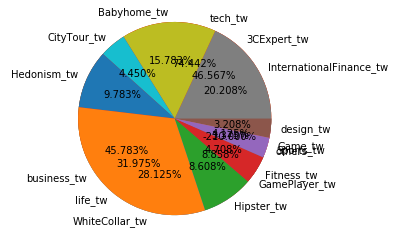

['others', '3CExpert_tw', 'business_tw', 'tech_tw', 'WhiteCollar_tw', 'GamePlayer_tw', 'Game_tw', 'InternationalFinance_tw', 'Babyhome_tw', 'CityTour_tw', 'Hedonism_tw', 'life_tw', 'Hipster_tw', 'Fitness_tw', 'Sports_tw', 'design_tw']


In [10]:
labels = dict_grp.keys()
size = dict_grp.values()
plt.pie(size , labels = labels,autopct='%5.3f%%')
plt.axis('equal')
plt.show()
recipe=[]
for l in labels:
    #print(l)
    recipe=recipe+[l]
print(recipe)

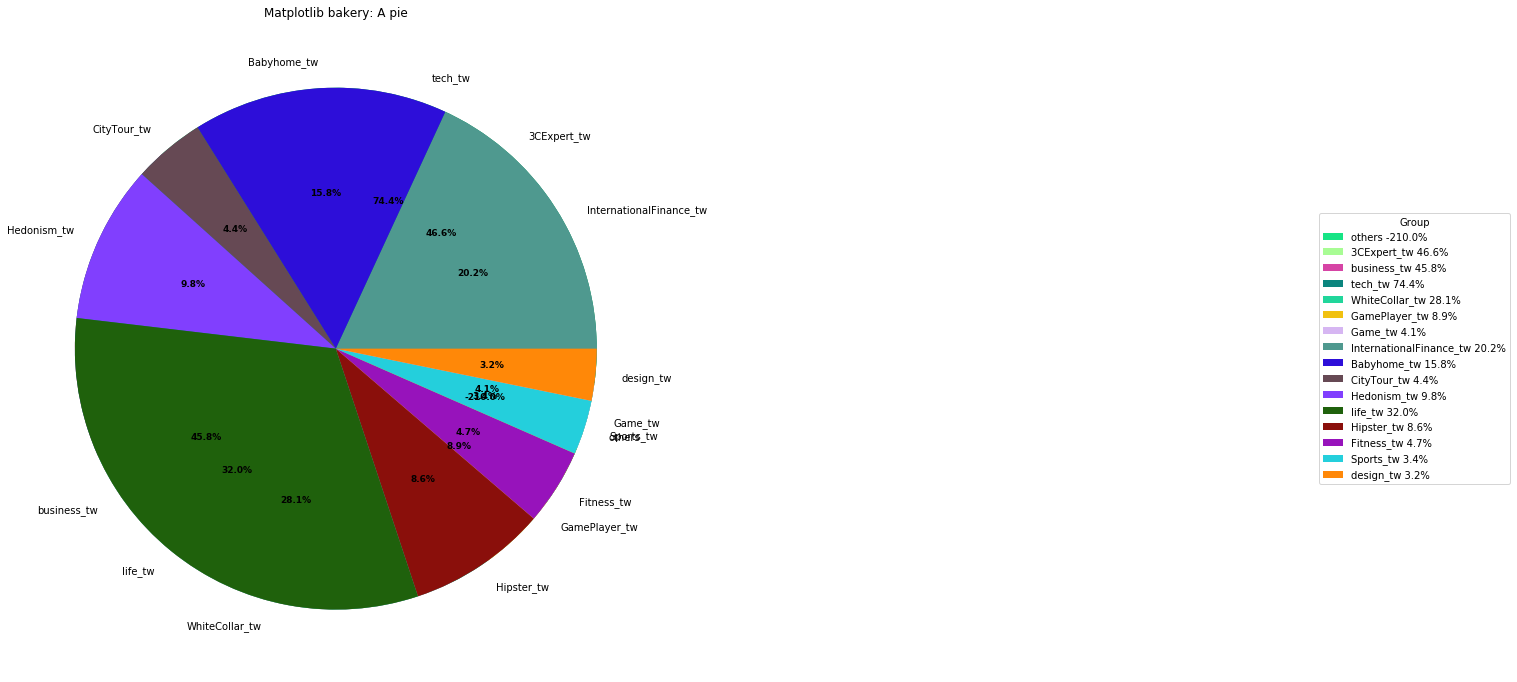

In [11]:
fig, ax = plt.subplots(figsize=(26, 12), subplot_kw=dict(aspect="equal"))

data = [v for x,v in dict_grp.items()]
ingredients = [x+ ' {:.1f}%'.format(v/total_news*100) for x,v in dict_grp.items()]
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(len(dict_grp))]
labels = dict_grp.keys()
size = dict_grp.values()
wedges, texts, autotexts = ax.pie(data, labels = labels,colors = colors,autopct='%1.1f%%')

ax.legend(wedges, ingredients,
          title="Group",
          loc="center left",
          bbox_to_anchor=(2, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [12]:
for i in range(0,total_news):
    question_time =  dict_item['publishtime'][i]*0.001
    #print(datetime.fromtimestamp(question_time).strftime('%Y-%m-%d %H:%M:%S'))
    dict_item['publishtime'][i] = datetime.fromtimestamp(question_time).strftime('%Y-%m-%d %H:%M:%S')

raw_data = {'title': dict_item['title'],
            'publishtime': dict_item['publishtime']}
df = pd.DataFrame(raw_data, columns = ['title','publishtime'])
#df.to_csv('final.csv')
df

,title,publishtime
0,「悠遊付」App 即將上線，用手機就能「嗶」進捷運、搭公車等四大功能、上線時間搶先看 | T...,2020-02-24 04:19:54
1,鴻海鄭州廠傳復工數逾 2 萬人，獎金升到 3.02 萬元 | TechNews 科技新報,2020-02-24 02:34:04
2,蘋果積極投入 5G 手機開發，AiP 模組將成為下一步關鍵 | TechNews 科技新報,2020-02-24 01:11:39
3,就算專案時程不合理，你還是能「這樣」要求調整 - 專案管理生活思維,2020-02-18 07:46:59
4,AI 發現能殺死高度抗藥性細菌的新抗生素,2020-02-24 09:00:00
...,...,...
995,市場先生社羣媒體頻道訂閱總整理(FB、私密社團、Line、Email、Telegram) -...,1582516202000
996,危機激起理財意識 元大證新開戶暴增10倍｜東森財經新聞,1582514019000
997,小蔥吃不完難保存？阿嬤教我「三個保鮮妙招」放半個月依舊翠綠新鮮 - 晨光日報,1582513380000
998,天平的兩端，平臺創業前你真的懂這三件事情嗎？,1582513220000


In [0]:

def url_path_to_dict(path):
    pattern = (r'^'
               r'((?P<schema>.+?)://)?'
               r'((?P<user>.+?)(:(?P<password>.*?))?@)?'
               r'(?P<host>.*?)'
               r'(:(?P<port>\d+?))?'
               r'(?P<path>/.*?)?'
               r'(?P<query>[?].*?)?'
               r'$'
               )
    regex = re.compile(pattern)
    m = regex.match(path)
    d = m.groupdict() if m is not None else None

    return d

In [0]:
def crawl(url,description,result,i):
   
    article=""
    #url=j['items'][idx]['linkurl']
    #description=j['items'][idx]['description']
    #print(description)
    #j['items'][idx]['linkurl']
    #print(url)
    dict_url=url_path_to_dict(url)
    #print(dict_url)
    #if(dict_url['host']=='www.jiqizhixin.com'):
    #    return
    
    try:
        response = requests.get(url,timeout=4)        
    except(ConnectionError, Exception)as e:
        print(url)
        print("Exception is :", e)
        article=description
        result[i] = article
    else:    
        r = requests.get(url)
        soup = BeautifulSoup(r.text, "html5lib")
    
        if(dict_url['host']=='technews.tw'):
            for t in soup.find(attrs={"class": "indent"}).find_all('p'):
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.managertoday.com.tw'):
            if soup.find(attrs={"class": "htmlview"}):
                for t in soup.find(attrs={"class": "htmlview"}).find_all('p'):
                    #print(t.text)
                    article=article+(t.text)
            elif soup.find(attrs={"itemprop":"articleBody"}):
                for t in soup.find(attrs={"itemprop":"articleBody"}).find_all('p'):
                    #print(t.text)
                    article=article+(t.text)
            else:
                article = description
        
        elif(dict_url['host']=='chinese.engadget.com'):
            try:
                soup.find(attrs={"data-testid": "PostContentContainer"}).find_all('div',attrs={"class": ""})
            except:
                print("except",url)
                article = description
            else:
                for t in soup.find(attrs={"data-testid": "PostContentContainer"}).find_all('div',attrs={"class": ""}):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.knowledger.info'):
            if soup.find(attrs={"class": "short"}):
                for t in soup.find(attrs={"class": "short"}).find_all('p'):
                    #print(t)
                    if(t.find(attrs={"class": "postedby"})):           
                        continue
                    if('style' in  t.attrs and t['style']=='text-align: right;'):            
                        continue
                    if(t.text!=''):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description
        elif(dict_url['host']=='www.storm.mg'):
            if soup.find(attrs={"class": "article_content_inner"}):
                for t in soup.find(attrs={"class": "article_content_inner"}).find_all('p'):
                    if(t.text=='\xa0'):
                        continue
                    if(t.find(attrs={"class": "related_copy_content"})):
                        continue
                    if(t.text!=''):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description

        
        elif(dict_url['host']=='www.projectup.net'):
            if soup.find(attrs={"class": "post_content"}):
                for t in soup.find(attrs={"class": "post_content"}).find_all('p'):
                    #print(t)
                    #if(t.find('br')):
                     #   continue
                    if(t.text!='\xa0'):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description
        elif(dict_url['host']=='www.smartm.com.tw'):
            for t in soup.find_all(attrs={"class": "Paragraph"}):
                #print(t.text)
                article=article+(t.text)
        elif(dict_url['host']=='free.com.tw'):
            for t in soup.find(attrs={"class": "dable-content-wrapper"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.thenewslens.com'):
            if soup.find(attrs={"class": "article-content"}):
                for t in soup.find(attrs={"class": "article-content"}).find_all('p'):
                    #print(t.text)
                    if(t.text[:5]==u'新聞來源：'):
                        break
                    article=article+(t.text)
            else:
                article = description
        elif(dict_url['host']=='qooah.com'):    
            for t in soup.find(attrs={"class": "td-post-content"}).find_all('p'):
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.techbang.com'):
            if soup.find(attrs={"class": "article-content"}):
                for t in soup.find(attrs={"class": "article-content"}).find_all('p'):
                    if(t.text=='\xa0'):
                        continue
                    if(t.text!=''):
                        #print(t.text)
                        article=article+(t.text)
            else:
                article = description                
        elif(dict_url['host']=='crossing.cw.com.tw'):    
            for t in soup.find(attrs={"class": "trackSection"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.darencademy.com'):    
            for t in soup.find(attrs={"class": "post_content"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='buzzorange.com'):
            for t in soup.find(attrs={"class": "entry-content"}).find_all('p'):
                if(t.text=='\xa0'):
                    continue
                if(t.text[:5]==u'延伸閱讀：'):
                    break
                if(t.text!=''):
                    #print(t.text)
                    article=article+(t.text)
        elif(dict_url['host']=='www.ithome.com.tw'):
            if soup.find(attrs={"class": "content"}):
                for t in soup.find(attrs={"class": "content"}).find_all('p'):
                    #print(t.text)
                    if(t.text=='\xa0'):
                        continue
                    if(t.text!=''):                
                        article=article+(t.text)
            else:
                article = description
        else:
            print(dict_url['host'])
            article = description
        
        result[i] = article
        
        #print(i,url,dict_url['host'],description)

In [0]:
def no(result,i,title):    
    result[i] = title

In [17]:

threads = [None] * 200
results = [None] * 200
#range(len(threads))
for i in range(0,200):
    if 'description' in total_api['items'][i].keys():
        threads[i] = Thread(target=crawl, args=(total_api['items'][i]['linkurl'], total_api['items'][i]['description'],results, i))
        threads[i].start()
    else:                
        threads[i] = Thread(target=no, args=(results, i,total_api['items'][i]['title']))
        threads[i].start()
    #else:
        #threads[i] = Thread(target=crawl, args=(total_api['items'][i]['linkurl'], total_api['items'][i]['title'],results, i))
        #threads[i].start()
# do some other stuff

for i in range(0,500):
    threads[i].join()

#print (" ".join(results))

#print(j['items'][74]['description'])

user78003.psee.io
www.inside.com.tw
www.inside.com.twwww.inside.com.tw

www.bnext.com.twwww.inside.com.twuser78003.psee.io


www.inside.com.twwww.inside.com.tw
www.jiqizhixin.comwww.jiqizhixin.com
www.jiqizhixin.com


www.jiqizhixin.comwww.jiqizhixin.com

www.inside.com.twagirls.aotter.net

www.bnext.com.tw
agirls.aotter.netwww.jiqizhixin.comagirls.aotter.net


www.bnext.com.tw
www.bnext.com.tw


Exception in thread Thread-192:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-14-8007cbaa1194>", line 95, in crawl
    for t in soup.find(attrs={"class": "dable-content-wrapper"}).find_all('p'):
AttributeError: 'NoneType' object has no attribute 'find_all'



pansci.asia
pansci.asia
www.bnext.com.tw
www.inside.com.tw
www.bnext.com.tw
www.bnext.com.tw
www.inside.com.tw
user78003.psee.io
www.jiqizhixin.com
www.inside.com.tw
www.inside.com.tw
www.inside.com.tw
www.inside.com.tw
www.inside.com.twwww.jiqizhixin.com
www.jiqizhixin.com

user78003.psee.io
www.jiqizhixin.comwww.jiqizhixin.com



Exception in thread Thread-272:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-14-8007cbaa1194>", line 95, in crawl
    for t in soup.find(attrs={"class": "dable-content-wrapper"}).find_all('p'):
AttributeError: 'NoneType' object has no attribute 'find_all'



agirls.aotter.net
agirls.aotter.net
agirls.aotter.net
www.jiqizhixin.com
www.bnext.com.tw
pansci.asiawww.bnext.com.tw

www.bnext.com.twpansci.asia



IndexError: ignored

In [0]:
def analyse(article,tagResult,i):
    topK = 3
    tags = jieba.analyse.textrank(article, topK=topK)
    
    tagResult[i] =  " ".join(tags)

In [19]:
threads = [None] * 200
tagResults = [None] * 200

for i in range(len(threads)):
    threads[i] = Thread(target=analyse, args=(results[i], tagResults, i))
    threads[i].start()

# do some other stuff

for i in range(len(threads)):
    threads[i].join()

#print (" ".join(results))
for i in range(0,200):
    print (i, tagResults[i])

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.775 seconds.
Prefix dict has been built successfully.
Exception in thread Thread-392:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-18-8cac1a49ccdd>", line 3, in analyse
    tags = jieba.analyse.textrank(article, topK=topK)
  File "/usr/local/lib/python3.6/dist-packages/jieba/analyse/textrank.py", line 84, in textrank
    words = tuple(self.tokenizer.cut(sentence))
  File "/usr/local/lib/python3.6/dist-packages/jieba/posseg/__init__.py", line 249, in cut
    for w in self.__cut_internal(sentence, HMM=HMM):
  File "/usr/local/lib/python3.6/dist-packages/jieba/posseg/__init__.py", line 217, in __cut_internal
    sentence = strdecode(sentence)
  File "/usr/local/lib/python3.

0 遊卡 支付 遊付
1 鄭州 廠區 中國
2 蘋果 手機 晶片
3 專案 沒有 時間
4 實驗 細菌 分子
5 使用 顯示 影片
6 影像 相機 理器
7 狂歡 歡慶 傳統
8 創新 咖啡 消費者
9 手機 部門 相機
10 工作 職場 公司
11 遊戲 作品 地下城
12 母語 語言 台語
13 法庭 建設 表示
14 中國 台灣 武漢
15 機身 帶來 關注
16 人員 醫療 防疫
17 充電場 電動車 歐洲
18 確診 韓國 民眾
19 疫情 肺炎 病例
20 肺炎 企業 武漢
21 集團 科技 庫幣
22 旅遊 專攻 稀有
23 任務 標軸 垂直
24 模型 問題 限制
25 資料 住家 包括
26 程式 裝置 出現
27 網路 全球 連網
28 手機 服務 只能
29 服務 電信 透過
30 
31 網路 建設 技術
32 網站 效期 公司
33 市場 全球 中國
34 程式 網站 用戶
35 漏洞 裝置 可能
36 辨識 資料 可能
37 進入 深圳 推出
38 領域 機視覺 世界
39 承諾 使用 服務
40 專案 建置 開發
41 實際 設計 技術
42 虛寶 電子 課稅
43 系統 企業 文化
44 機器 需求 應用
45 廣告 應用 程式
46 醫學 深度 學習
47 大家 使用 功能
48 認證 收到 提醒
49 組裝 蘋果 鄭州
50 基金 光速 中國
51 駕駛 自動 產業
52 遵守 知道 品牌
53 造型 年老 已成
54 美國 半導體 生產
55 準備 迎接 挑戰
56 發動 爆震 旋轉
57 技術 太陽 認為
58 汽車 認為 營收
59 中國 文化 團隊
60 技術 高空 服務
61 病毒 抗原 士兵
62 崛起 傳統 市場
63 生活 臭鼬 事業
64 
65 音樂 大師 享受
66 時候 羨慕 拿著
67 真主 示威者 宗派
68 保障 樓市 投機
69 女性 神經 身體
70 波蘭 法官 司法
71 辣椒素 身體 辣椒
72 醫師 醫療 疏失
73 電影 補助 申請
74 成長 疫情 平台
75 口罩 不能 資料
76 馬來西亞 希望 土著
77 染色 課本 熟悉
78 食物 造成 身體
79 活動 會員 會館
80 None
81 關心 銷售 沒有
82 工作 時間 番茄
83 方法 失敗 解決
84 人脈 資源 人生


In [22]:
alltags=" "
for i in range(0,200):
    try:
                  alltags=alltags+tagResults[i]     
    except TypeError:
                  alltags=alltags +" "
#print(alltags)
font = r'C:\Windows\Fonts\msj.ttc'
wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2,max_words=20).generate(alltags)

plt.imshow(wc)
plt.axis("off")
plt.show()

OSError: ignored